In [4]:
import pandas as pd

# Sample fruit data
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Watermelon', 'Grapes', 'Pear', 'Mango', 'Strawberry'],
    'Weight': [150, 120, 130, 3000, 5, 160, 200, 15],           # grams
    'Sweetness': [7, 8, 6, 9, 8, 6, 9, 7],                      # scale 1-10
    'Crunchiness': [9, 1, 2, 1, 2, 8, 3, 5],                    # scale 1-10
}

df = pd.DataFrame(data)
df.set_index('Fruit', inplace=True)
df


,Weight,Sweetness,Crunchiness
Fruit,,,
Apple,150,7,9
Banana,120,8,1
Orange,130,6,2
Watermelon,3000,9,1
Grapes,5,8,2
Pear,160,6,8
Mango,200,9,3
Strawberry,15,7,5


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

# Show results
print(df)


            Weight  Sweetness  Crunchiness  Cluster
Fruit                                              
Apple          150          7            9        2
Banana         120          8            1        1
Orange         130          6            2        0
Watermelon    3000          9            1        1
Grapes           5          8            2        1
Pear           160          6            8        2
Mango          200          9            3        1
Strawberry      15          7            5        0


C:\Users\kolki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


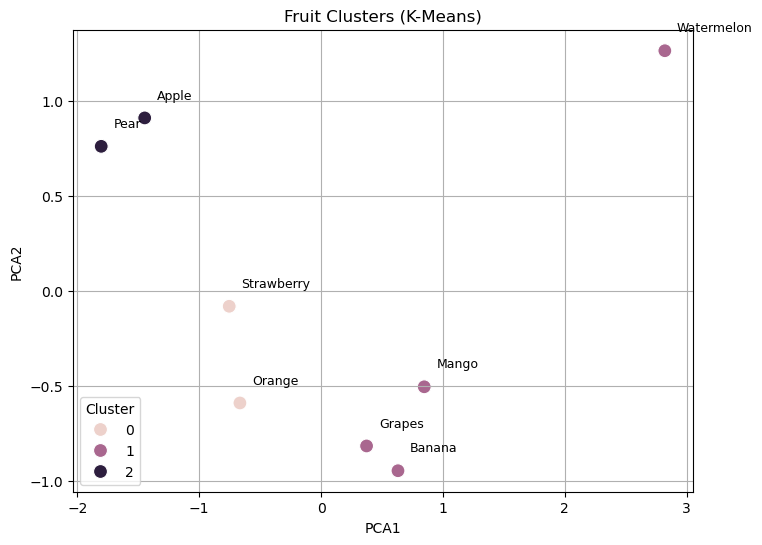

In [3]:
import seaborn as sns

# PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', s=100)
for fruit, row in df.iterrows():
    plt.text(row['PCA1']+0.1, row['PCA2']+0.1, fruit, fontsize=9)
plt.title("Fruit Clusters (K-Means)")
plt.grid(True)
plt.show()


In [6]:
# Bin numerical values into categories
df_assoc = df.copy()

df_assoc['Weight'] = pd.cut(df['Weight'], bins=[0, 100, 200, 10000], labels=['Light', 'Medium', 'Heavy'])
df_assoc['Sweetness'] = pd.cut(df['Sweetness'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])
df_assoc['Crunchiness'] = pd.cut(df['Crunchiness'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])

# (Optional) include cluster as a category
df_assoc['Cluster'] = 'Cluster_' + df['Cluster'].astype(str)

print(df_assoc)


            Weight Sweetness Crunchiness    Cluster
Fruit                                              
Apple       Medium    Medium        High  Cluster_2
Banana      Medium      High         Low  Cluster_1
Orange      Medium    Medium         Low  Cluster_0
Watermelon   Heavy      High         Low  Cluster_1
Grapes       Light      High         Low  Cluster_1
Pear        Medium    Medium        High  Cluster_2
Mango       Medium      High         Low  Cluster_1
Strawberry   Light    Medium      Medium  Cluster_0


In [7]:
# One-hot encode all categorical features
df_encoded = pd.get_dummies(df_assoc)

print(df_encoded)


            Weight_Light  Weight_Medium  Weight_Heavy  Sweetness_Low  \
Fruit                                                                  
Apple              False           True         False          False   
Banana             False           True         False          False   
Orange             False           True         False          False   
Watermelon         False          False          True          False   
Grapes              True          False         False          False   
Pear               False           True         False          False   
Mango              False           True         False          False   
Strawberry          True          False         False          False   

            Sweetness_Medium  Sweetness_High  Crunchiness_Low  \
Fruit                                                           
Apple                   True           False            False   
Banana                 False            True             True   
Orange             

In [6]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -----------------------

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. One-hot encode WITH feature names
df_encoded = pd.get_dummies(df_assoc, prefix=['Weight', 'Sweetness', 'Crunchiness'])

# 2. Convert to boolean
df_encoded = df_encoded.astype(bool)

# 3. Run Apriori
frequent_items = apriori(df_encoded, min_support=0.2, use_colnames=True)

if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.7)
    
    # 4. Format output to show full feature-value pairs
    rules['antecedents'] = rules['antecedents'].apply(lambda x: [i.replace('_', '=') for i in x])
    rules['consequents'] = rules['consequents'].apply(lambda x: [i.replace('_', '=') for i in x])
    
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No rules found. Try lowering min_support.")

                            antecedents                        consequents  \
0                    [Sweetness=Medium]                    [Weight=Medium]   
1                    [Crunchiness=High]                    [Weight=Medium]   
2                    [Crunchiness=High]                 [Sweetness=Medium]   
3                     [Crunchiness=Low]                   [Sweetness=High]   
4                      [Sweetness=High]                  [Crunchiness=Low]   
5     [Weight=Medium, Crunchiness=High]                 [Sweetness=Medium]   
6  [Sweetness=Medium, Crunchiness=High]                    [Weight=Medium]   
7                    [Crunchiness=High]  [Weight=Medium, Sweetness=Medium]   
8       [Weight=Medium, Sweetness=High]                  [Crunchiness=Low]   

   support  confidence      lift  
0    0.375        0.75  1.200000  
1    0.250        1.00  1.600000  
2    0.250        1.00  2.000000  
3    0.500        0.80  1.600000  
4    0.500        1.00  1.600000  
5    0.25

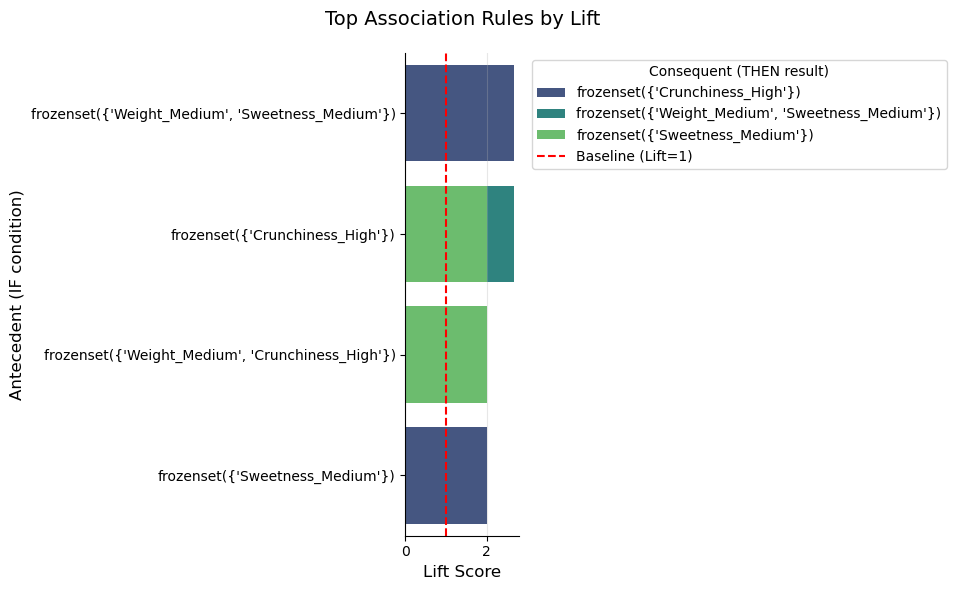

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get your rules (using previous code)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# 2. Sort by lift and select top N
top_rules = rules.sort_values('lift', ascending=False).head(5)

# 3. Create a visually appealing plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, y='antecedents', x='lift', hue='consequents', 
            dodge=False, palette='viridis')

# 4. Add annotations and formatting
plt.title("Top Association Rules by Lift", pad=20, fontsize=14)
plt.xlabel("Lift Score", fontsize=12)
plt.ylabel("Antecedent (IF condition)", fontsize=12)
plt.axvline(x=1, color='red', linestyle='--', label='Baseline (Lift=1)')
plt.legend(title='Consequent (THEN result)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

Lift ≥ 1.5 (meaningful association):How much more likely the rule is than random chance

Confidence ≥ 0.7 (high accuracy)

Support ≥ 0.2 (frequent enough to matter)

High support + high confidence = reliable but obvious rules
Medium support + high lift = interesting hidden patterns